In [15]:

# General
import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile

#title


In [29]:
## Save your IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    channel="ibm_quantum",

    token="55ddbddb007bbc07e4b093124f1045491e393a53ee5df189375485aa3e4e33fc9e90c452f81d22915a766d4a8b262ec3cdcfa1d2ca90c84255b57a144cf14c4d",

    set_as_default=True,

    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [30]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
backend.name

'ibm_brisbane'

# Shor 9 qubit code 


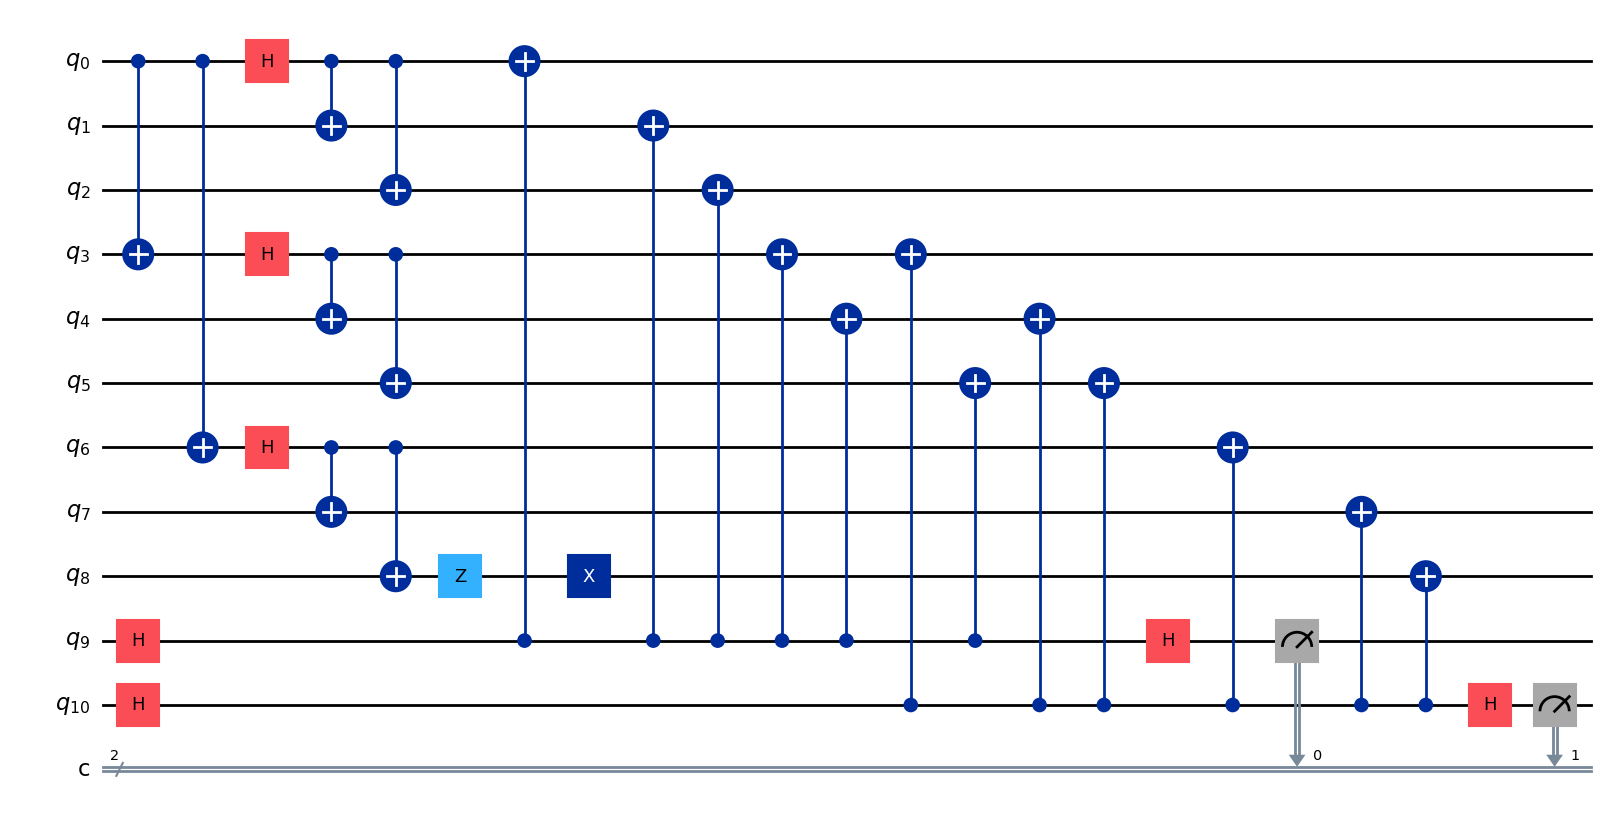

In [28]:
qc = QuantumCircuit(11,2)

qc.cx(0,3)
qc.cx(0,6)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)
qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)


qc.z(8) # add error phase

#syndorme extraction
qc.h(10)
qc.h(9)
for i in range (6):
    qc.cx(9, i)
for i in range (6):
    qc.cx(10,3+i)
qc.h(10)
qc.h(9)
qc.measure(9,0)
qc.measure(10,1)
qc.draw('mpl')






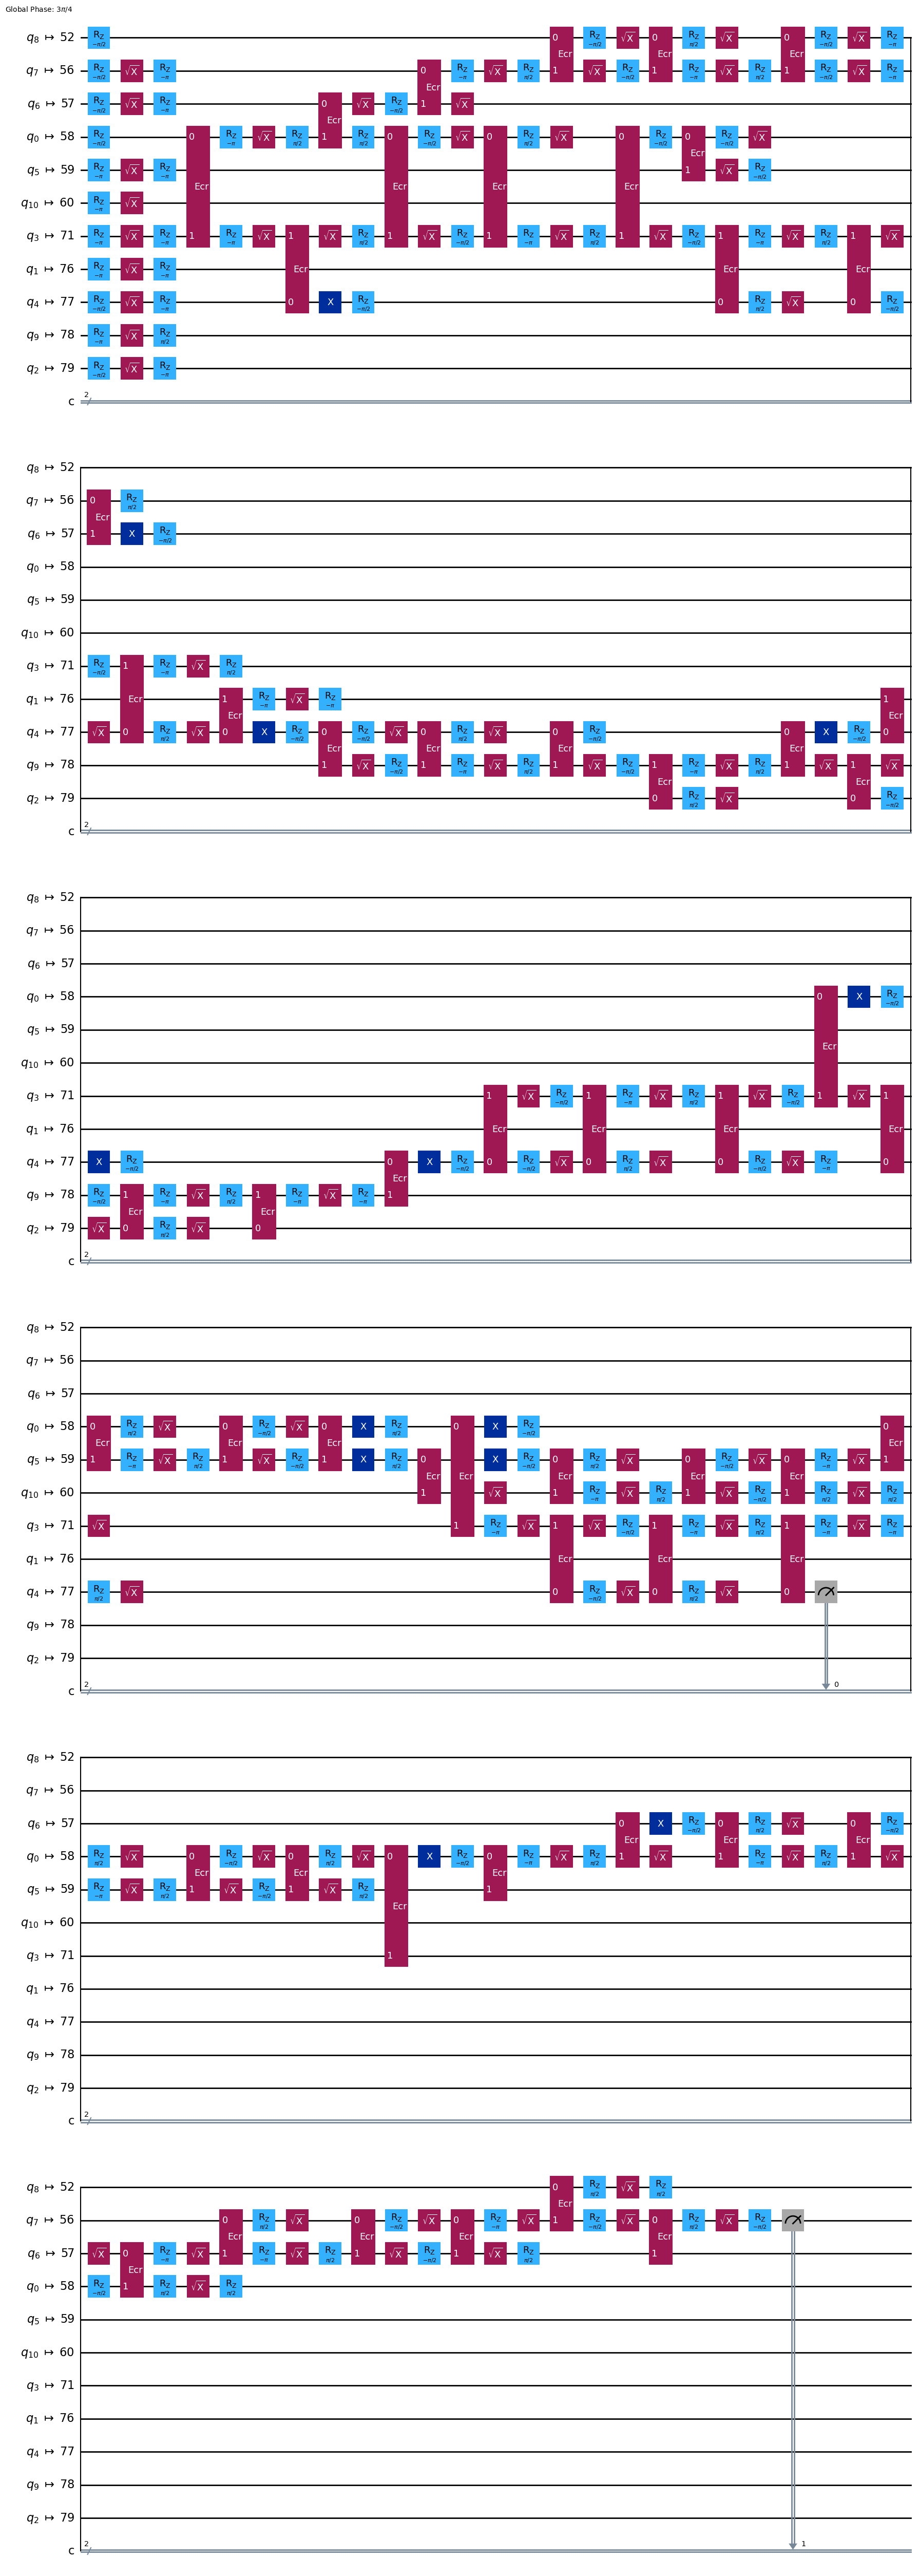

In [32]:
from qiskit import generate_preset_pass_manager


pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)